In [1]:
import sys
import calendar

import numpy as np
from scipy.stats import gamma
import matplotlib.pyplot as plt
import xarray as xr

sys.path.append('/g/data/wp00/shared_code/qqscale')
import utils

In [2]:
xvals = np.arange(0, 100, 0.1)

In [3]:
quantiles = np.arange(0.005, 1.0, 0.01)
quantiles

array([0.005, 0.015, 0.025, 0.035, 0.045, 0.055, 0.065, 0.075, 0.085,
       0.095, 0.105, 0.115, 0.125, 0.135, 0.145, 0.155, 0.165, 0.175,
       0.185, 0.195, 0.205, 0.215, 0.225, 0.235, 0.245, 0.255, 0.265,
       0.275, 0.285, 0.295, 0.305, 0.315, 0.325, 0.335, 0.345, 0.355,
       0.365, 0.375, 0.385, 0.395, 0.405, 0.415, 0.425, 0.435, 0.445,
       0.455, 0.465, 0.475, 0.485, 0.495, 0.505, 0.515, 0.525, 0.535,
       0.545, 0.555, 0.565, 0.575, 0.585, 0.595, 0.605, 0.615, 0.625,
       0.635, 0.645, 0.655, 0.665, 0.675, 0.685, 0.695, 0.705, 0.715,
       0.725, 0.735, 0.745, 0.755, 0.765, 0.775, 0.785, 0.795, 0.805,
       0.815, 0.825, 0.835, 0.845, 0.855, 0.865, 0.875, 0.885, 0.895,
       0.905, 0.915, 0.925, 0.935, 0.945, 0.955, 0.965, 0.975, 0.985,
       0.995])

In [4]:
len(quantiles)

100

## Cannon example

See Section 4 of [Cannon et al (2015)](https://journals.ametsoc.org/view/journals/clim/28/17/jcli-d-14-00754.1.xml#bib44).

In [39]:
def plot_distribution(ax, xvals, obs_pdf, hist_pdf, future_pdf):
    """Plot rainfall distribution"""

    ax.plot(xvals, obs_pdf, color='tab:red', label='obs')
    ax.plot(xvals, hist_pdf, color='black', label='hist')
    ax.plot(xvals, future_pdf, color='tab:blue', label='future')
    ax.set_xlabel('precipitation (mm/day)')
    ax.set_ylabel('density')
    ax.legend()
    ax.set_xlim(0, 100)
    ax.set_title('Rainfall distribution')
    ax.grid()

    
def plot_quantiles(ax, quantiles, obs_quantiles, hist_quantiles, future_quantiles):
    """Plot quantiles"""

    ax.plot(quantiles, obs_quantiles, marker='o', color='tab:red', label='obs')
    ax.plot(quantiles, hist_quantiles, marker='o', color='black', label='hist')
    ax.plot(quantiles, future_quantiles, marker='o', color='tab:blue', label='future')
    ax.legend()
    ax.set_ylabel('rainfall (mm)')
    ax.set_xlabel('quantile')
    ax.set_title('Rainfall quantiles')
    ax.grid()

    
def plot_adjustments(ax, quantiles, adjustment_factors, mean_scaling, ylim=None):
    """Plot adjustment factors"""

    ax.plot(quantiles, adjustment_factors, marker='o')
    ax.axhline(mean_scaling)
    ax.set_ylabel('adjustment factor')
    ax.set_xlabel('quantile')
    ax.set_title('Adjustment factors')
    ax.grid()
    if not ylim is None:
        ax.set_ylim(ylim)
    
    
def gamma_analysis(future_shape, future_scale):
    """Run the Cannon example"""

    obs_shape = 4.0
    obs_scale = 7.5
    hist_shape = 8.15
    hist_scale = 3.68
    
    obs_std = gamma.std(a=obs_shape, scale=obs_scale)
    hist_std = gamma.std(a=hist_shape, scale=hist_scale)
    future_std = gamma.std(a=future_shape, scale=future_scale)

    print(f'Obs std: {obs_std:.1f}')
    print(f'Hist std: {hist_std:.1f}')
    print(f'Future std: {future_std:.1f}')
    
    obs_mean = gamma.mean(a=obs_shape, scale=obs_scale)
    hist_mean = gamma.mean(a=hist_shape, scale=hist_scale)
    future_mean = gamma.mean(a=future_shape, scale=future_scale)

    print(f'Obs mean: {obs_mean:.1f}')
    print(f'Hist mean: {hist_mean:.1f}')
    print(f'Future mean: {future_mean:.1f}')
    
    fig = plt.figure(figsize=[8, 16])
    ax1 = fig.add_subplot(311)
    ax2 = fig.add_subplot(312)
    ax3 = fig.add_subplot(313)

    obs_pdf = gamma.pdf(xvals, a=obs_shape, scale=obs_scale)
    hist_pdf = gamma.pdf(xvals, a=hist_shape, scale=hist_scale)
    future_pdf = gamma.pdf(xvals, a=future_shape, scale=future_scale)
    plot_distribution(ax1, xvals, obs_pdf, hist_pdf, future_pdf)
    
    obs_quantiles = gamma.ppf(quantiles, a=obs_shape, scale=obs_scale)
    hist_quantiles = gamma.ppf(quantiles, a=hist_shape, scale=hist_scale)
    future_quantiles = gamma.ppf(quantiles, a=future_shape, scale=future_scale)
    plot_quantiles(ax2, quantiles, obs_quantiles, hist_quantiles, future_quantiles)
    
    hist_mean = gamma.mean(a=hist_shape, scale=hist_scale)
    future_mean = gamma.mean(a=future_shape, scale=future_scale)
    mean_scaling = future_mean / hist_mean
    adjustment_factors = future_quantiles / hist_quantiles
    plot_adjustments(ax3, quantiles, adjustment_factors, mean_scaling)

    hist_adjusted = adjustment_factors * hist_quantiles
    model_change = ((hist_adjusted.sum() - hist_quantiles.sum()) / hist_quantiles.sum()) * 100
    obs_adjusted = adjustment_factors * obs_quantiles
    qq_change = ((obs_adjusted.sum() - obs_quantiles.sum()) / obs_quantiles.sum()) * 100
    print(f'Model change in rainfall: {model_change:.1f}%')
    print(f'QQ change in rainfall: {qq_change:.1f}%')
    
    plt.show()

### Example 1 (from paper)
Model underestimates variance, projected change is for a wetter future.

Obs std: 15.0
Hist std: 10.5
Future std: 10.5
Obs mean: 30.0
Hist mean: 30.0
Future mean: 42.1
Model change in rainfall: 40.3%
QQ change in rainfall: 38.3%


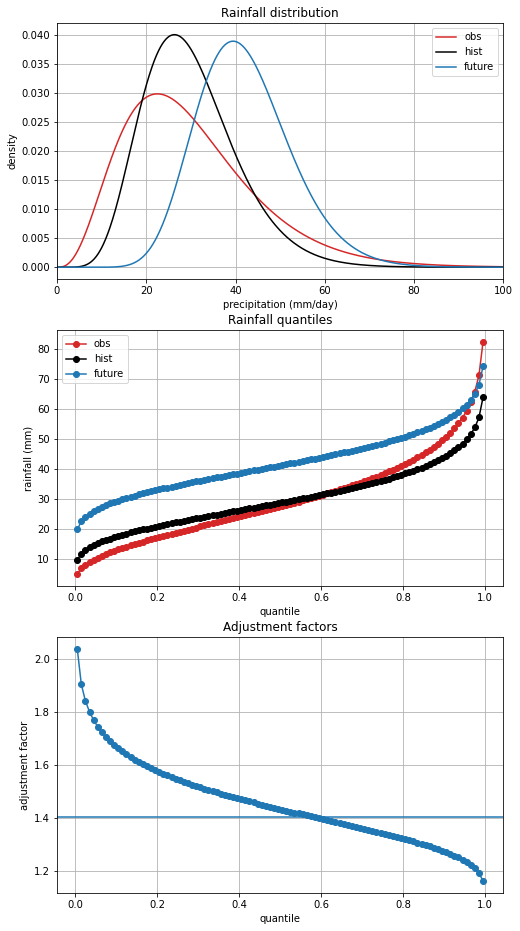

In [6]:
gamma_analysis(16, 2.63)

### Example 2

Model underestimates variance, projected change is for a drier future.

Obs std: 15.0
Hist std: 10.5
Future std: 11.0
Obs mean: 30.0
Hist mean: 30.0
Future mean: 24.0
Model change in rainfall: -20.0%
QQ change in rainfall: -18.8%


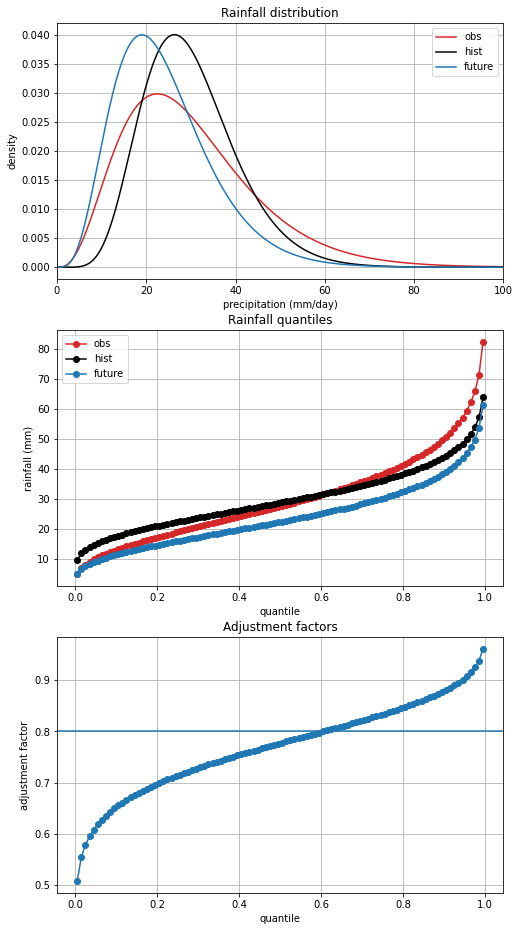

In [7]:
gamma_analysis(4.8, 5)

### Summary

So the multiplicative adjustments are larger in magnitude at lower quantiles because the relative difference between the historical and future values is greater at lower rainfall amounts.

If the model underestimates the observed variance, a relatively lower proportion of the observed rainfall is at lower amounts (to recieve the bigger adjustment) so the magnitude of the qq-scaled change is smaller than the magnitude of the GCM change.

## Real data

In [8]:
hist_file = "/g/data/wp00/data/QQ-CMIP6/ACCESS-ESM1-5/historical/r1i1p1f1/day/pr/v20191115/pr-ssr_day_ACCESS-ESM1-5_historical_r1i1p1f1_gn_19950101-20141231.nc"
future_file = "/g/data/wp00/data/QQ-CMIP6/ACCESS-ESM1-5/ssp370/r1i1p1f1/day/pr/v20191115/pr-ssr_day_ACCESS-ESM1-5_ssp370_r1i1p1f1_gn_20560101-20851231.nc"
obs_file = "/g/data/wp00/data/AGCD/precip-ssr_AGCD_r005_19900101-20191231_daily.nc"
qq_file = "/g/data/wp00/data/QQ-CMIP6/ACCESS-ESM1-5/ssp370/r1i1p1f1/day/pr/v20191115/pr-ssr_day_ACCESS-ESM1-5_ssp370_r1i1p1f1_AUS-r005_20560101-20851231_qdm-multiplicative-monthly-q100-nearest_AGCD-19900101-20191231_historical-19950101-20141231.nc"
hist_time_bounds = ["1995-01-01", "2014-12-31"]
future_time_bounds = ["2056-01-01", "2085-12-31"]
obs_time_bounds = ["1990-01-01", "2019-12-31"]

In [9]:
hist_units = "mm day-1"
future_units = "mm day-1"
obs_units = "mm day-1"
output_units = "mm day-1"
hist_var = "pr"
future_var = "pr"
obs_var = "precip"

In [10]:
ds_hist = utils.read_data(
    hist_file,
    hist_var,
    time_bounds=hist_time_bounds,
    input_units=hist_units,
    output_units=output_units,
)
da_hist = ds_hist[hist_var]

In [11]:
ds_future = utils.read_data(
    future_file,
    future_var,
    time_bounds=future_time_bounds,
    input_units=future_units,
    output_units=output_units,
)
da_future = ds_future[future_var]

In [12]:
ds_obs = utils.read_data(
    obs_file,
    obs_var,
    time_bounds=obs_time_bounds,
    input_units=obs_units,
    output_units=output_units
)
da_obs = ds_obs[obs_var]

In [13]:
ds_qq = xr.open_dataset(qq_file)
da_qq = ds_qq[obs_var]

In [14]:
def rptot(da, pct, total=None):
    """Calculate rXXpTOT for a given percentile"""
    
    pct_value = utils.get_quantiles(da, [pct], timescale='annual').values
    upper = float(da.where(da > pct_value).sum().values)
    if total is None:
        total_rainfall = float(da.sum().values)
    else:
        total_rainfall = total
    result = (upper / total_rainfall) * 100
    
    return result

In [15]:
def get_pct_in_each_bin(da, total):
    """Get the perentage of total rainfall in each bin"""

    pct_above_each_bin = []
    for pct in np.arange(0, 1, 0.01):
        value = rptot(da, pct, total=total)
        pct_above_each_bin.append(value)
    pct_above_each_bin = np.array(pct_above_each_bin)
    pct_in_each_bin = pct_above_each_bin[0:-1] - pct_above_each_bin[1:]
    pct_in_each_bin = np.append(pct_in_each_bin, pct_above_each_bin[-1])
    
    return pct_in_each_bin

In [16]:
def plot_normalised_quantile_change(
    ax,
    da_obs,
    da_hist,
    adjustment_factors,
    obs_annual_total=None,
    hist_annual_total=None,
):
    """Plot normalised change in each quantile"""
    
    if obs_annual_total is None:
        obs_total = float(da_obs.sum().values)
        hist_total = float(da_hist.sum().values)
        ylabel = '% change (relative to total monthly precipitation)'
    else:
        obs_total = obs_annual_total
        hist_total = hist_annual_total
        ylabel = '% change (relative to total annual precipitation)'
        obs_sub_total_rainfall = float(da_obs.sum().values)
        obs_sub_total_fraction = obs_sub_total_rainfall / obs_annual_total
        print(f'Obs fraction of total rainfall: {obs_sub_total_fraction:.2f}')
        hist_sub_total_rainfall = float(da_hist.sum().values)
        hist_sub_total_fraction = hist_sub_total_rainfall / hist_annual_total
        print(f'Hist fraction of total rainfall: {hist_sub_total_fraction:.2f}')
    
    obs_pct_in_each_bin = get_pct_in_each_bin(da_obs, obs_total)
    hist_pct_in_each_bin = get_pct_in_each_bin(da_hist, hist_total)
    obs_change_in_each_bin = (obs_pct_in_each_bin * adjustment_factors.values) - obs_pct_in_each_bin
    hist_change_in_each_bin = (hist_pct_in_each_bin * adjustment_factors.values) - hist_pct_in_each_bin
    ax.bar(np.arange(0, 100, 1), obs_change_in_each_bin, label='obs', alpha=0.5)
    ax.bar(np.arange(0, 100, 1), hist_change_in_each_bin, label='hist', alpha=0.5)
    ax.legend()
    ax.set_xlim(60, 100)
    ax.set_title('Normalised change')
    ax.set_ylabel(ylabel)
    ax.set_xlabel('Percentile')
    
    return obs_change_in_each_bin.sum(), hist_change_in_each_bin.sum()

In [36]:
def real_analysis(city, months):
    """Process real data"""

    lat, lon = city_lat_lon[city]
    point_selection = {'lat': lat, 'lon': lon}
    
    da_hist_point = da_hist.sel(point_selection, method='nearest')
    da_hist_point = da_hist_point.compute()
    hist_quantiles = utils.get_quantiles(da_hist_point, quantiles, timescale='monthly')
    
    da_future_point = da_future.sel(point_selection, method='nearest')
    da_future_point = da_future_point.compute()
    future_quantiles = utils.get_quantiles(da_future_point, quantiles, timescale='monthly')
    
    da_obs_point = da_obs.sel(point_selection, method='nearest')
    da_obs_point = da_obs_point.compute()
    obs_quantiles = utils.get_quantiles(da_obs_point, quantiles, timescale='monthly')
    
    da_qq_point = da_qq.sel(point_selection, method='nearest')
    da_qq_point = da_qq_point.compute()
    
    hist_annual_mean = da_hist_point.data.mean()
    future_annual_mean = da_future_point.data.mean()
    model_annual_change = ((future_annual_mean - hist_annual_mean) / hist_annual_mean) * 100

    obs_annual_mean = da_obs_point.data.mean()
    qq_annual_mean = da_qq_point.data.mean()
    qq_annual_change = ((qq_annual_mean - obs_annual_mean) / obs_annual_mean) * 100    
    print(f'Model annual mean change in rainfall: {model_annual_change:.1f}%')
    print(f'QQ annual change in rainfall: {qq_annual_change:.1f}%')
    
    obs_annual_total = da_obs_point.data.sum()
    hist_annual_total = da_hist_point.data.sum()
    obs_monthly_total = da_obs_point.groupby('time.month').sum('time')
    hist_monthly_total = da_hist_point.groupby('time.month').sum('time')
    
    obs_norm_changes_month = []
    hist_norm_changes_month = []
    obs_norm_changes_annual = []
    hist_norm_changes_annual = []
    mean_scalings_month = []
    for month in months:
        month_name = calendar.month_name[month]

        da_hist_point_month = da_hist_point[da_hist_point['time'].dt.month == month]
        da_future_point_month = da_future_point[da_future_point['time'].dt.month == month]
        da_obs_point_month = da_obs_point[da_obs_point['time'].dt.month == month]
    
        obs_quantiles_month = obs_quantiles.sel({'month': month})
        hist_quantiles_month = hist_quantiles.sel({'month': month})
        future_quantiles_month = future_quantiles.sel({'month': month})
        
        fig = plt.figure(figsize=[8, 22])
        ax1 = fig.add_subplot(411)
        ax2 = fig.add_subplot(412)
        ax3 = fig.add_subplot(413)
        ax4 = fig.add_subplot(414)
        
        # Plot 1: Quantiles
        plot_quantiles(ax1, quantiles, obs_quantiles_month, hist_quantiles_month, future_quantiles_month)

        # Plot 2: Adjustment factors
        hist_mean_month = da_hist_point_month.data.mean()
        future_mean_month = da_future_point_month.data.mean()
        mean_scaling_month = future_mean_month / hist_mean_month
        adjustment_factors_month = future_quantiles_month / hist_quantiles_month
        plot_adjustments(ax2, quantiles, adjustment_factors_month, mean_scaling_month, ylim=[0, 2])
        mean_scalings_month.append(mean_scaling_month)
        
        # Plot 3: Normalised changes (for that month)
        obs_norm_change_month, hist_norm_change_month = plot_normalised_quantile_change(
            ax3,
            da_obs_point_month,
            da_hist_point_month,
            adjustment_factors_month,
        )
        obs_norm_changes_month.append(obs_norm_change_month)
        hist_norm_changes_month.append(hist_norm_change_month)
        
        # Plot 4: Normalised changes (against annual total)
        obs_norm_change_annual, hist_norm_change_annual = plot_normalised_quantile_change(
            ax4,
            da_obs_point_month,
            da_hist_point_month,
            adjustment_factors_month,
            obs_annual_total=obs_annual_total,
            hist_annual_total=hist_annual_total,
        )
        obs_norm_changes_annual.append(obs_norm_change_annual)
        hist_norm_changes_annual.append(hist_norm_change_annual)
        
        obs_r99ptot_month = rptot(da_obs_point_month, 0.99)
        obs_r95ptot_month = rptot(da_obs_point_month, 0.95)
        obs_r75ptot_month = rptot(da_obs_point_month, 0.75)
        print(f'Obs R99pTOT {month_name}: {obs_r99ptot_month:.1f}%')
        print(f'Obs R95pTOT {month_name}: {obs_r95ptot_month:.1f}%')
        print(f'Obs R75pTOT {month_name}: {obs_r75ptot_month:.1f}%')

        hist_r99ptot_month = rptot(da_hist_point_month, 0.99)
        hist_r95ptot_month = rptot(da_hist_point_month, 0.95)
        hist_r75ptot_month = rptot(da_hist_point_month, 0.75)
        print(f'Hist R99pTOT {month_name}: {hist_r99ptot_month:.1f}%')
        print(f'Hist R95pTOT {month_name}: {hist_r95ptot_month:.1f}%')
        print(f'Hist R75pTOT {month_name}: {hist_r75ptot_month:.1f}%')

        plt.show()
    
    norm_changes = [
        obs_norm_changes_month,
        hist_norm_changes_month,
        obs_norm_changes_annual,
        hist_norm_changes_annual,
    ]
    totals = [
        obs_annual_total,
        hist_annual_total,
        obs_monthly_total,
        hist_monthly_total,      
    ]
    
    return norm_changes, totals, mean_scalings_month

In [37]:
city_lat_lon = {
    'Hobart': (-42.9, 147.3),
    'Melbourne': (-37.8, 145.0),
    'Thredbo': (-36.5, 148.3),
    'Sydney': (-33.9, 151.2),
    'Brisbane': (-27.5, 153.0),
    'Cairns': (-16.9, 145.8),
    'Darwin': (-12.5, 130.8),
    'Alice Springs': (-23.7, 133.9),
    'Port Hedland': (-20.3, 118.6),
    'Geraldton': (-28.8, 114.6),
    'Perth': (-32.0, 115.9),
    'Adelaide': (-34.9, 138.6),
}

Model annual mean change in rainfall: -11.6%
QQ annual change in rainfall: 2.4%
Obs fraction of total rainfall: 0.14
Hist fraction of total rainfall: 0.06
Obs R99pTOT January: 27.6%
Obs R95pTOT January: 62.9%
Obs R75pTOT January: 96.2%
Hist R99pTOT January: 26.8%
Hist R95pTOT January: 55.1%
Hist R75pTOT January: 85.1%


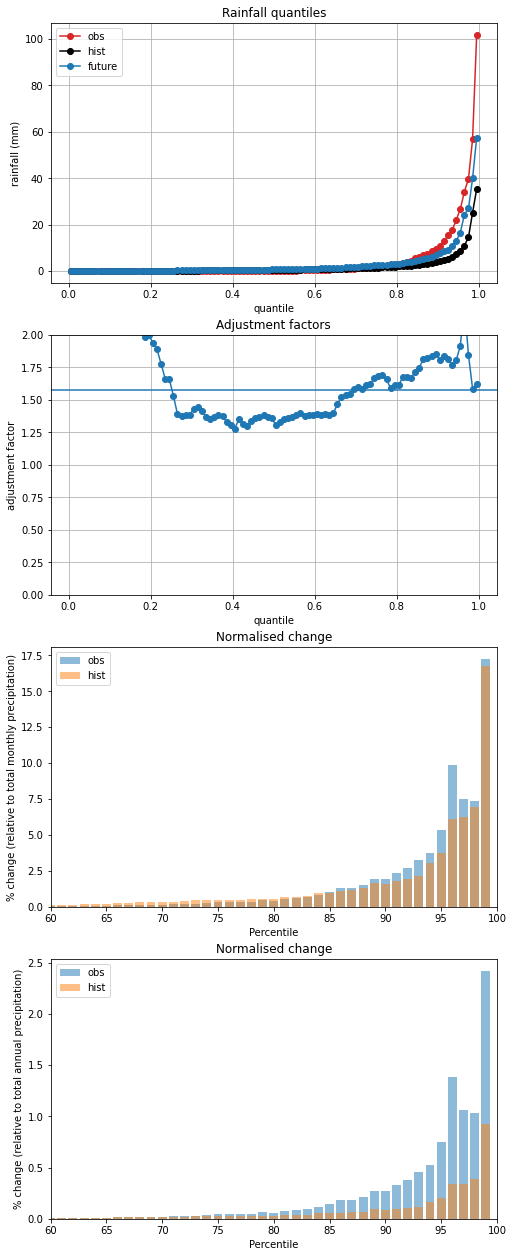

Obs fraction of total rainfall: 0.15
Hist fraction of total rainfall: 0.07
Obs R99pTOT February: 20.4%
Obs R95pTOT February: 57.1%
Obs R75pTOT February: 93.5%
Hist R99pTOT February: 19.4%
Hist R95pTOT February: 48.7%
Hist R75pTOT February: 83.3%


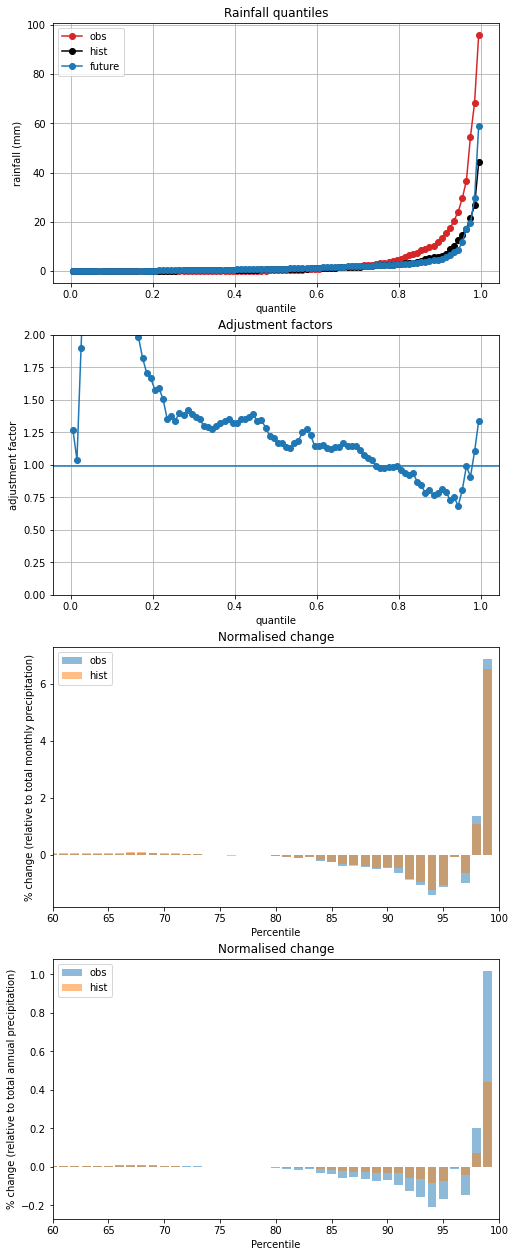

Obs fraction of total rainfall: 0.12
Hist fraction of total rainfall: 0.12
Obs R99pTOT March: 26.9%
Obs R95pTOT March: 59.1%
Obs R75pTOT March: 93.8%
Hist R99pTOT March: 15.9%
Hist R95pTOT March: 43.5%
Hist R75pTOT March: 79.5%


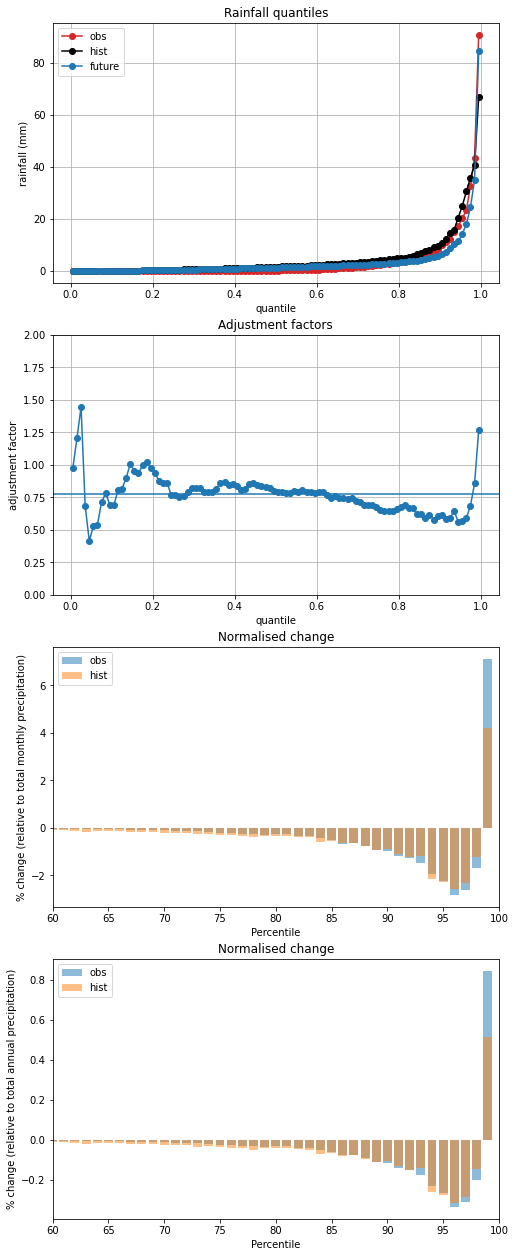

Obs fraction of total rainfall: 0.07
Hist fraction of total rainfall: 0.13
Obs R99pTOT April: 25.0%
Obs R95pTOT April: 60.5%
Obs R75pTOT April: 95.8%
Hist R99pTOT April: 14.0%
Hist R95pTOT April: 39.1%
Hist R75pTOT April: 77.0%


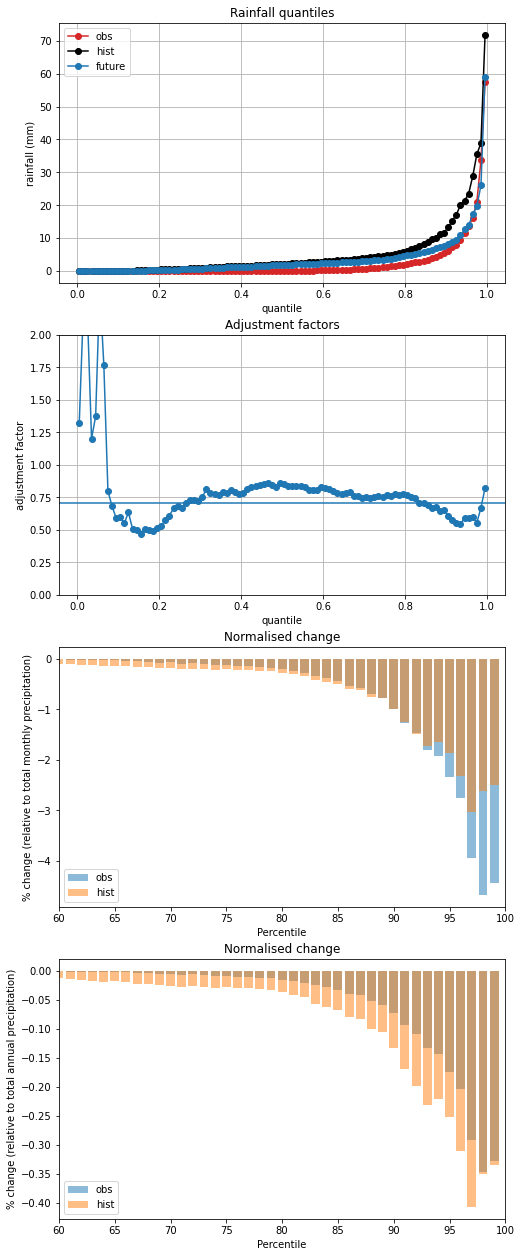

Obs fraction of total rainfall: 0.08
Hist fraction of total rainfall: 0.13
Obs R99pTOT May: 40.9%
Obs R95pTOT May: 72.6%
Obs R75pTOT May: 98.5%
Hist R99pTOT May: 12.8%
Hist R95pTOT May: 36.3%
Hist R75pTOT May: 77.7%


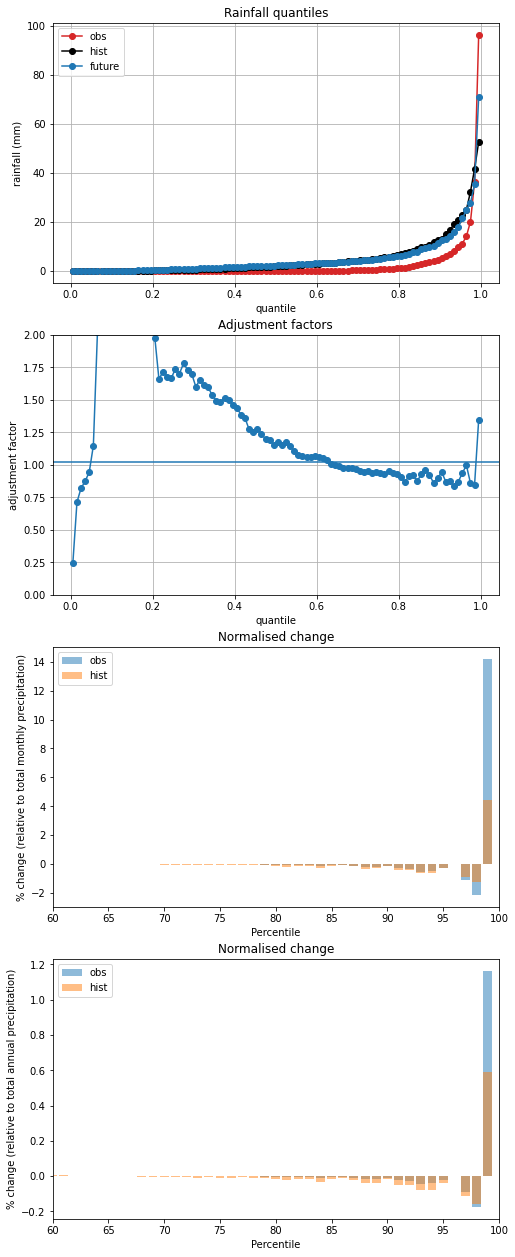

Obs fraction of total rainfall: 0.06
Hist fraction of total rainfall: 0.14
Obs R99pTOT June: 29.7%
Obs R95pTOT June: 68.5%
Obs R75pTOT June: 98.6%
Hist R99pTOT June: 14.5%
Hist R95pTOT June: 41.0%
Hist R75pTOT June: 84.4%


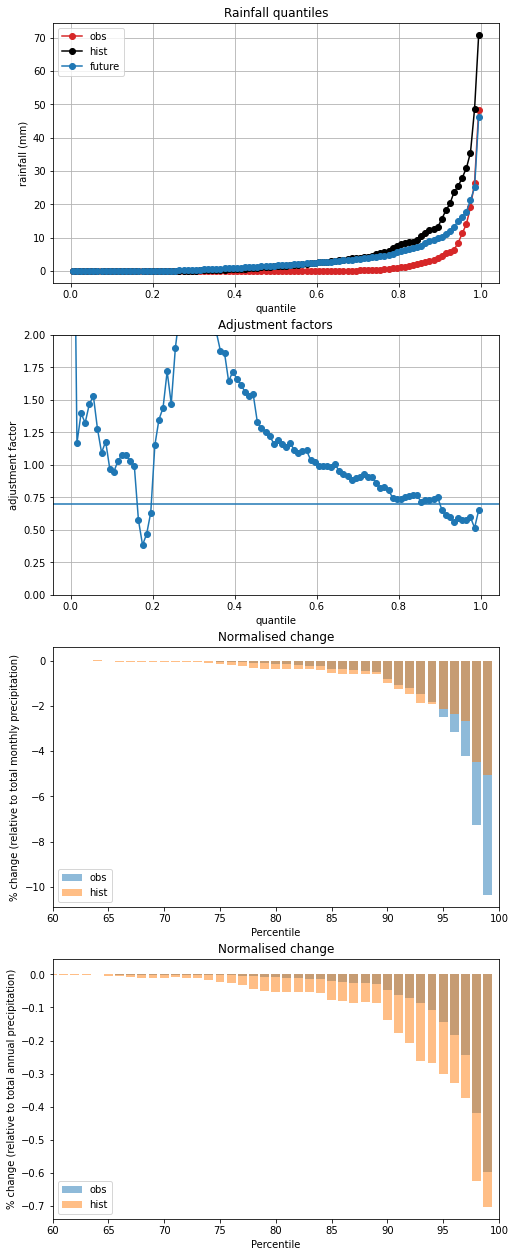

Obs fraction of total rainfall: 0.03
Hist fraction of total rainfall: 0.09
Obs R99pTOT July: 30.5%
Obs R95pTOT July: 71.1%
Obs R75pTOT July: 99.4%
Hist R99pTOT July: 15.9%
Hist R95pTOT July: 43.2%
Hist R75pTOT July: 84.1%


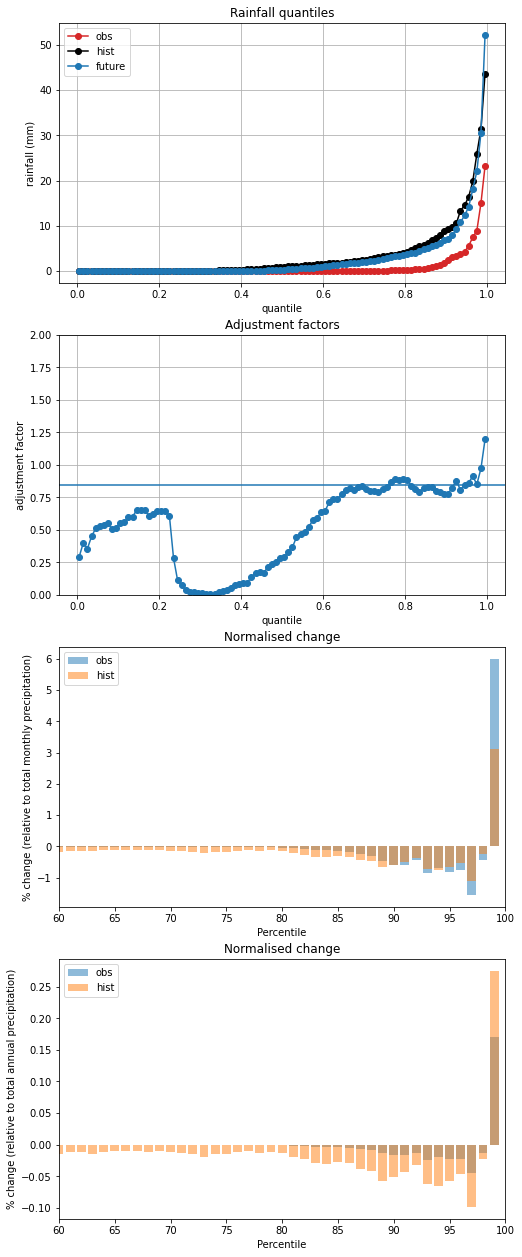

Obs fraction of total rainfall: 0.03
Hist fraction of total rainfall: 0.06
Obs R99pTOT August: 37.3%
Obs R95pTOT August: 77.7%
Obs R75pTOT August: 99.8%
Hist R99pTOT August: 21.4%
Hist R95pTOT August: 48.2%
Hist R75pTOT August: 89.4%


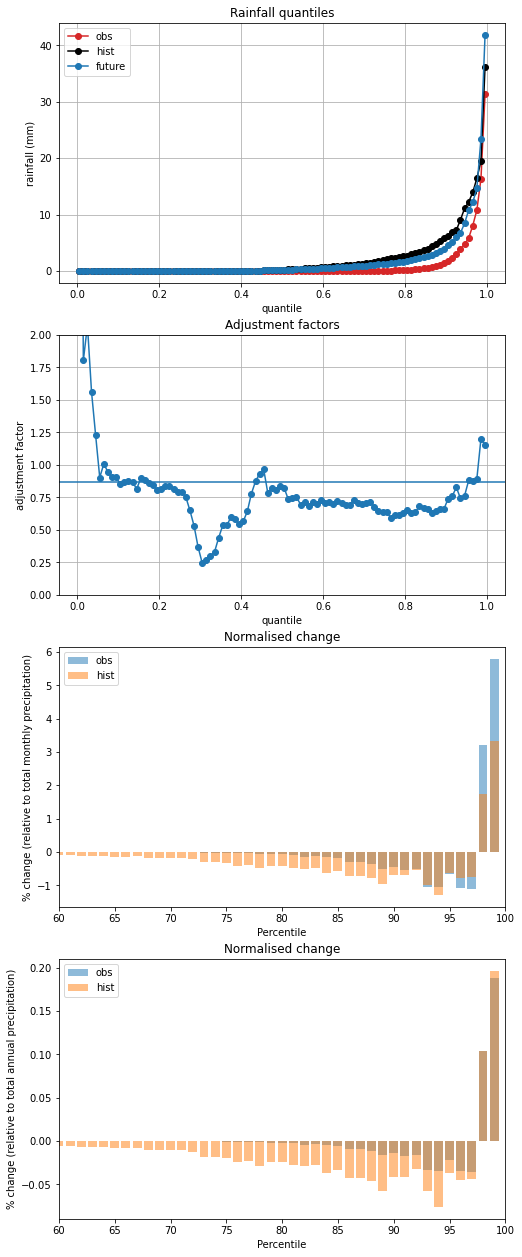

Obs fraction of total rainfall: 0.03
Hist fraction of total rainfall: 0.03
Obs R99pTOT September: 24.7%
Obs R95pTOT September: 68.8%
Obs R75pTOT September: 99.0%
Hist R99pTOT September: 30.3%
Hist R95pTOT September: 59.5%
Hist R75pTOT September: 91.5%


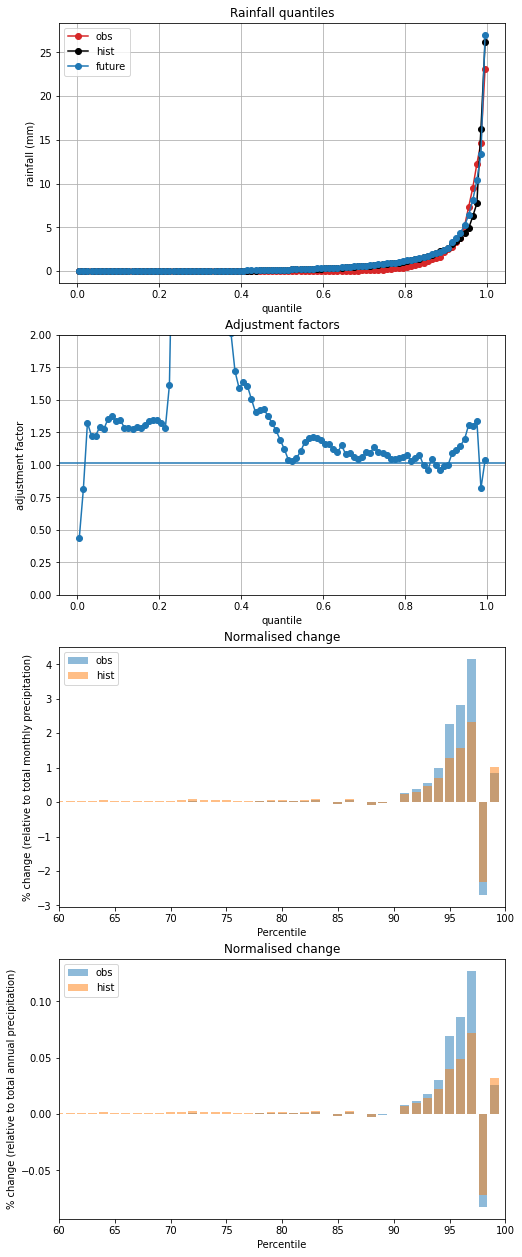

Obs fraction of total rainfall: 0.07
Hist fraction of total rainfall: 0.03
Obs R99pTOT October: 23.5%
Obs R95pTOT October: 59.8%
Obs R75pTOT October: 98.0%
Hist R99pTOT October: 18.7%
Hist R95pTOT October: 47.0%
Hist R75pTOT October: 85.7%


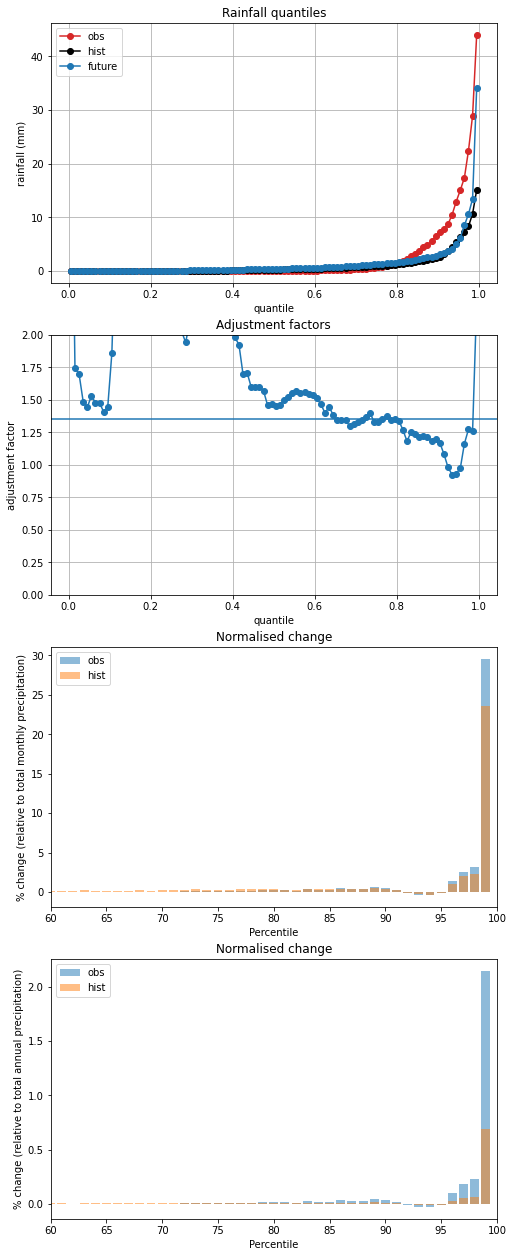

Obs fraction of total rainfall: 0.09
Hist fraction of total rainfall: 0.07
Obs R99pTOT November: 18.1%
Obs R95pTOT November: 50.9%
Obs R75pTOT November: 96.3%
Hist R99pTOT November: 23.1%
Hist R95pTOT November: 57.7%
Hist R75pTOT November: 88.9%


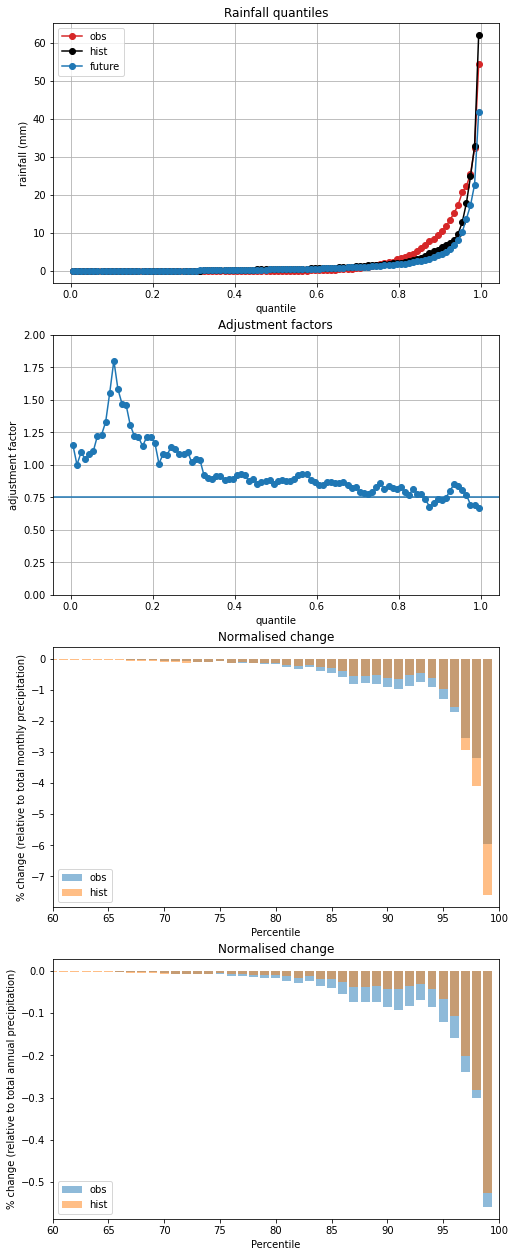

Obs fraction of total rainfall: 0.12
Hist fraction of total rainfall: 0.07
Obs R99pTOT December: 16.7%
Obs R95pTOT December: 49.8%
Obs R75pTOT December: 95.1%
Hist R99pTOT December: 20.0%
Hist R95pTOT December: 48.9%
Hist R75pTOT December: 87.3%


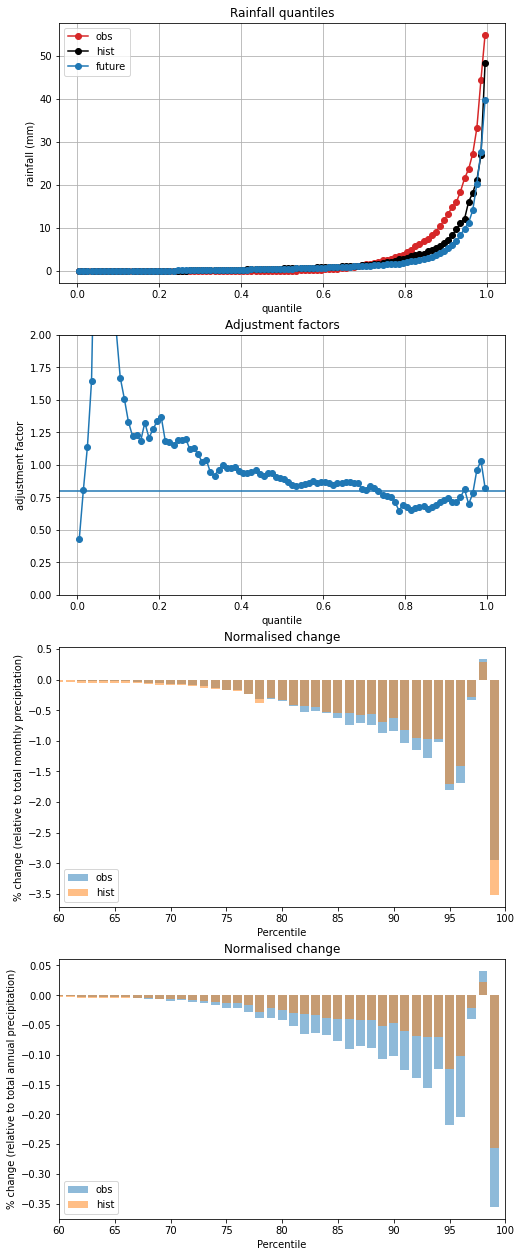

In [40]:
norm_changes, totals, mean_scalings_month = real_analysis(
    'Brisbane',
    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
)

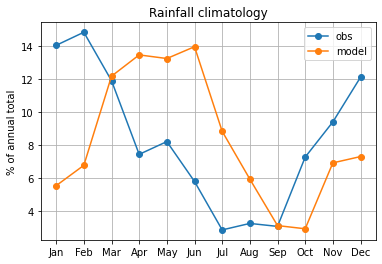

In [75]:
obs_annual_total, hist_annual_total, obs_monthly_total, hist_monthly_total = totals
obs_month_annual_pct = (obs_monthly_total.values / obs_annual_total) * 100 
hist_month_annual_pct = (hist_monthly_total.values / hist_annual_total) * 100

xticks = np.arange(1, 13)
xtick_labels = [calendar.month_abbr[i] for i in xticks]

plt.plot(xticks, obs_month_annual_pct, label='obs', marker='o')
plt.plot(xticks, hist_month_annual_pct, label='model', marker='o')
plt.title('Rainfall climatology')
plt.legend()
plt.ylabel('% of annual total')
plt.xticks(xticks, xtick_labels)
plt.grid()
plt.show()

Obs change in rainfall: 3.1%
Hist change in rainfall: -10.4%
Obs change in rainfall (monthly mean scaling only): -1.4%
Hist change in rainfall (monthly mean scaling only): -11.6%
Obs change in rainfall (distribution bias only): 4.5%
Hist change in rainfall (distribution bias only): 1.2%


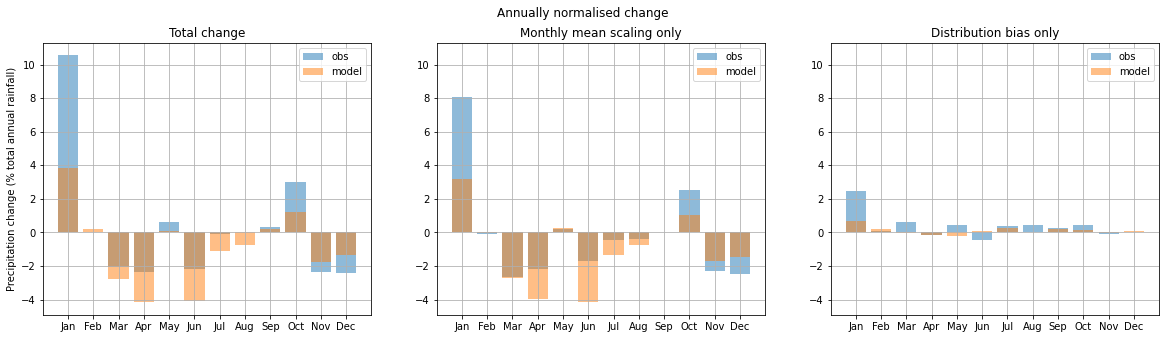

In [77]:
obs_norm_changes_month, hist_norm_changes_month, obs_norm_changes_annual, hist_norm_changes_annual = norm_changes

fig = plt.figure(figsize=[20, 5])
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132, sharey=ax1)
ax3 = fig.add_subplot(133, sharey=ax1)

# Plot 1: Total change
ax1.bar(xticks, obs_norm_changes_annual, alpha=0.5, label='obs')
ax1.bar(xticks, hist_norm_changes_annual, alpha=0.5, label='model')
ax1.set_title('Total change')
ax1.legend()
ax1.set_ylabel('Precipitation change (% total annual rainfall)')
ax1.set_xticks(xticks, xtick_labels)
ax1.grid()

obs_norm_changes_annual_sum = np.array(obs_norm_changes_annual).sum()
hist_norm_changes_annual_sum = np.array(hist_norm_changes_annual).sum()
print(f'Obs change in rainfall: {obs_norm_changes_annual_sum:.1f}%')
print(f'Hist change in rainfall: {hist_norm_changes_annual_sum:.1f}%')

# Plot 2: Monthly mean scaling only
obs_month_only_changes = (obs_month_annual_pct * mean_scalings_month) - obs_month_annual_pct
hist_month_only_changes = (hist_month_annual_pct * mean_scalings_month) - hist_month_annual_pct
ax2.bar(xticks, obs_month_only_changes, alpha=0.5, label='obs')
ax2.bar(xticks, hist_month_only_changes, alpha=0.5, label='model')
ax2.set_title('Monthly mean scaling only')
ax2.legend()
ax2.set_xticks(xticks, xtick_labels)
ax2.grid()

obs_month_only_changes_sum = np.array(obs_month_only_changes).sum()
hist_month_only_changes_sum = np.array(hist_month_only_changes).sum()
print(f'Obs change in rainfall (monthly mean scaling only): {obs_month_only_changes_sum:.1f}%')
print(f'Hist change in rainfall (monthly mean scaling only): {hist_month_only_changes_sum:.1f}%')

# Plot 3: Distribution bias only 
obs_distribution_change = obs_norm_changes_annual - obs_month_only_changes
hist_distribution_change = hist_norm_changes_annual - hist_month_only_changes
ax3.bar(xticks, obs_distribution_change, alpha=0.5, label='obs')
ax3.bar(xticks, hist_distribution_change, alpha=0.5, label='model')
ax3.set_title('Distribution bias only')
ax3.legend()
ax3.set_xticks(xticks, xtick_labels)
ax3.grid()

obs_distribution_change_sum = np.array(obs_distribution_change).sum()
hist_distribution_change_sum = np.array(hist_distribution_change).sum()
print(f'Obs change in rainfall (distribution bias only): {obs_distribution_change_sum:.1f}%')
print(f'Hist change in rainfall (distribution bias only): {hist_distribution_change_sum:.1f}%')

plt.suptitle('Annually normalised change')
plt.show()

obs_month_only_change_sum = np.array(obs_month_only_changes).sum()
hist_month_only_change_sum = np.array(hist_month_only_changes).sum()

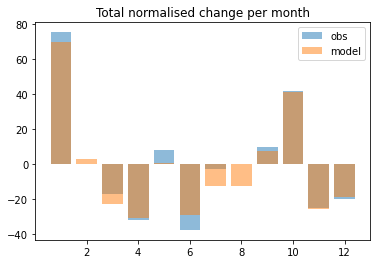

In [32]:
plt.bar(np.arange(1, 13), obs_norm_changes_month, alpha=0.5, label='obs')
plt.bar(np.arange(1, 13), hist_norm_changes_month, alpha=0.5, label='model')
plt.title('Total normalised change per month')
plt.legend()
plt.show()